In [2]:
! pip install qiskit qiskit-aer
! pip install mthree


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.6 MB 5.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 8.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 8.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.5/1.6 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.4/2.8 MB 13.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.8 MB 11.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 10.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.7/2.8 MB 10.8 MB/s eta 0:00:01
   -------------------------------- ------- 2.3/2.8 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 10.4 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Original Counts: {'000': 498, '111': 502}
Mitigated Counts: {'000': 0.49799999594688416, '111': 0.5019999742507935}


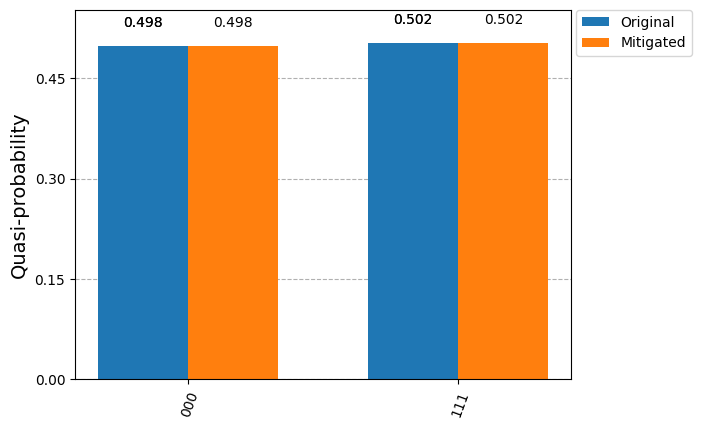

In [3]:
# Import necessary modules from Qiskit and mthree
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import mthree

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT from qubit 0 to 1
qc.cx(0, 2)    # CNOT from qubit 0 to 2
qc.measure([0, 1, 2], [0, 1, 2])  # Measure all qubits

# Transpile the circuit for the backend
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the circuit directly using BackendV2 (no need for assemble)
job = backend.run(transpiled_qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Print original (noisy) measurement results
print(f"Original Counts: {counts}")

# Initialize mthree mitigator and calibrate for qubits [0, 1, 2]
mitigator = mthree.M3Mitigation(backend)
mitigator.cals_from_system([0, 1, 2])

# Apply measurement error mitigation
mitigated_counts = mitigator.apply_correction(counts, qubits=[0, 1, 2]).nearest_probability_distribution()

# Print mitigated counts
print(f"Mitigated Counts: {mitigated_counts}")

# Plot histograms for original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])
